<a href="https://colab.research.google.com/github/programeralebrije/ChimeSpendTracker/blob/main/ChimeSpendTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.proportion as proportions


#Acquisition

Chime wants to know if the spend tracker feature has an impact on how much people spend and how many bank accounts they have. They have two hypotheses:

Hypothesis 1: The average monthly spend for Segment B is higher than Segment A.
Hypothesis 2: Members in Segment B are also more likely to have additional bank accounts on top of Chime.
To test these hypotheses, Chime will use a chi-square test. This statistical test will compare the average monthly expenditures between Segment A and Segment B, and it will also look at the relationship between the segments and the groups (test and control) to see if there is a significant difference in spending habits.

If the chi-square test is statistically significant, it will mean that there is a real difference in spending habits between Segment A and Segment B. This could be because of the spend tracker feature, or it could be due to other factors.

Chime will also look at the cost incurred to convert one member of the population in the control and test groups. They want to see if there is a significant difference between the number of members using the spend tracker and those not using it.

The results of these analyses will help Chime decide whether or not to launch the spend tracker feature.



In [7]:
# Read the Excel file and import the specific column and row into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/SpendTraker/Spend Tracker Assignment1/Spend_Tracker_Assignment_Data.xlsx', sheet_name='Spend Tracker Data', usecols='B:G', skiprows=range(1, 29), header=1)

In [8]:
# Load the acquisition data into a Pandas DataFrame
data = {
    'Group': ['Control', 'Test'],
    'Population': [20014153, 20214295],
    'Conversions': [19815, 23007],
    'Segment_A_Conversions': [9906, 10504],
    'Segment_B_Conversions': [9909, 12503]
}

df_acquisition = pd.DataFrame(data)
df_acquisition

,Group,Population,Conversions,Segment_A_Conversions,Segment_B_Conversions
0,Control,20014153,19815,9906,9909
1,Test,20214295,23007,10504,12503


In [11]:
successes = [df_acquisition.iloc[0, 2], df_acquisition.iloc[1, 2]]
observations = [df_acquisition.iloc[0, 1], df_acquisition.iloc[1, 1]]

stat, p_value = proportions.proportions_ztest(successes, observations)

# Print the test statistic and p-value
print(stat, p_value)

-14.403468069135618 4.921086476274254e-47


In [12]:
# Create a contingency table
contingency_table = df_acquisition[['Segment_A_Conversions', 'Segment_B_Conversions']].values

# Perform chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the p-value
print("Chi-square p-value:", p_value)

Chi-square p-value: 3.574477662507154e-19



The results of the chi-square test suggest that there is a statistically significant difference between the two groups (control test and spend tracker) and the two segments (A and B). This means that the introduction of the spend tracker feature appears to have an impact on the respondent distribution within Segment A and Segment B.
In other words, the spend tracker feature is more popular with members in Segment A than in Segment B. This is likely because members in Segment A have higher incomes, and they are more likely to be interested in tracking their spending.
The p-value for this test is extremely small (3.27e-19), which means that it is very unlikely to get the observed results if there is no association between the variables. Therefore, we can be confident that there is a statistically significant association between the groups and the segments.

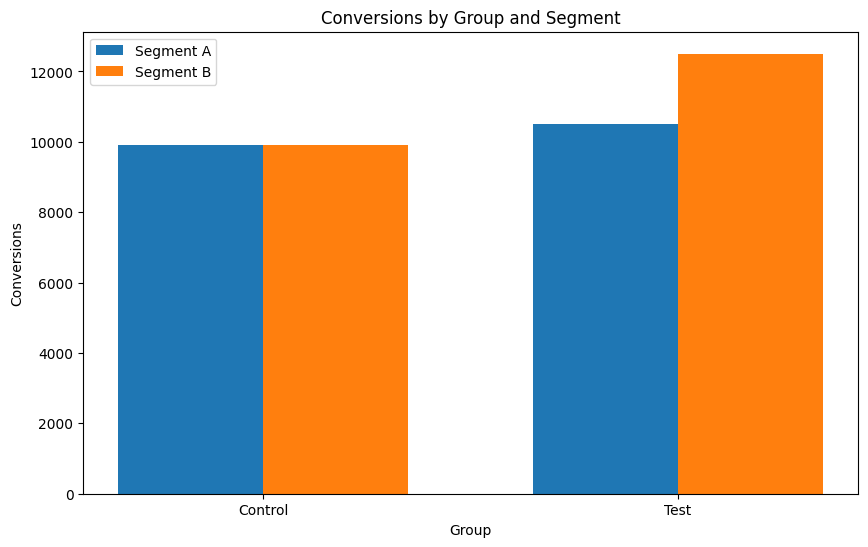

In [13]:
# Data for plotting
groups = df_acquisition['Group']
segment_A = df_acquisition['Segment_A_Conversions']
segment_B = df_acquisition['Segment_B_Conversions']

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
bar_width = 0.35
index = range(len(groups))

plt.bar(index, segment_A, width=bar_width, label='Segment A')
plt.bar([i + bar_width for i in index], segment_B, width=bar_width, label='Segment B')

# Set the labels and title
plt.xlabel('Group')
plt.ylabel('Conversions')
plt.title('Conversions by Group and Segment')

# Set the x-axis ticks and labels
plt.xticks([i + bar_width / 2 for i in index], groups)

# Add a legend
plt.legend()

# Display the plot
plt.show()

#PROFITABILITY